[![UAEM](https://www.uaem.mx/fcaei/images/uaem.png)](https://www.uaem.mx/fcaei/moca.html)
[![Python 3.9](https://img.shields.io/badge/Python-3.9-blue.svg)](https://www.python.org/downloads/release/python-390/)
[![Maintenance](https://img.shields.io/badge/Maintained%3F-yes-green.svg)](https://github.com/EmilianoRdzV/AIR-QUALITY)

# Proyecto: Análisis y Predicción de la Calidad del Aire con Machine Learning

**Autor:** [Emiliano Rodriguez Villegas](https://github.com/EmilianoRdzV)
**Fecha:** 06 de Junio de 2025
**Versión:** 1.0

---

## 1. Introducción y Motivación

Este notebook presenta un análisis completo de la calidad del aire en seis metrópolis globales. El objetivo es aplicar un flujo de trabajo de ciencia de datos, desde la limpieza de datos hasta la construcción de un modelo de Machine Learning para clasificar la calidad del aire.

La elección de este conjunto de datos se basa en su **volumen**, la **diversidad geográfica** de las ciudades, la **riqueza de sus características** y su **componente temporal**, que lo hacen ideal para el análisis y la modelización.

---

### Índice General del Notebook

1.  [**Metodología y Preparación**](#fase-1)
    * [1.1. Diagrama de Flujo del Proyecto](#1-1)
    * [1.2. Carga de Datos desde URL](#1-2)
    * [1.3. Preprocesamiento y Limpieza](#1-3)
    * [1.4. Análisis Estadístico Descriptivo](#1-4)
2.  [**Modelado de Clasificación**](#fase-2)
    * [2.1. Preparación de Datos para el Modelo](#2-1)
    * [2.2. Entrenamiento del Modelo (Perceptrón / Adaline)](#2-2)
    * [2.3. Visualización de Resultados](#2-3)
3.  [**Discusión y Trabajo Futuro**](#fase-3)
    * [3.1. Análisis del Modelo y Propuestas de Mejora](#3-1)
    * [3.2. Comparación con la Literatura](#3-2)
    * [3.3. Trabajo Futuro](#3-3)

## <a id="fase-1"></a>1. Metodología y Preparación

### <a id="1-1"></a>1.1. Diagrama de Flujo del Proyecto

A continuación, se presenta un diagrama de flujo que resume visualmente la metodología y los pasos a seguir en este proyecto, desde la adquisición de los datos hasta la obtención de conclusiones.

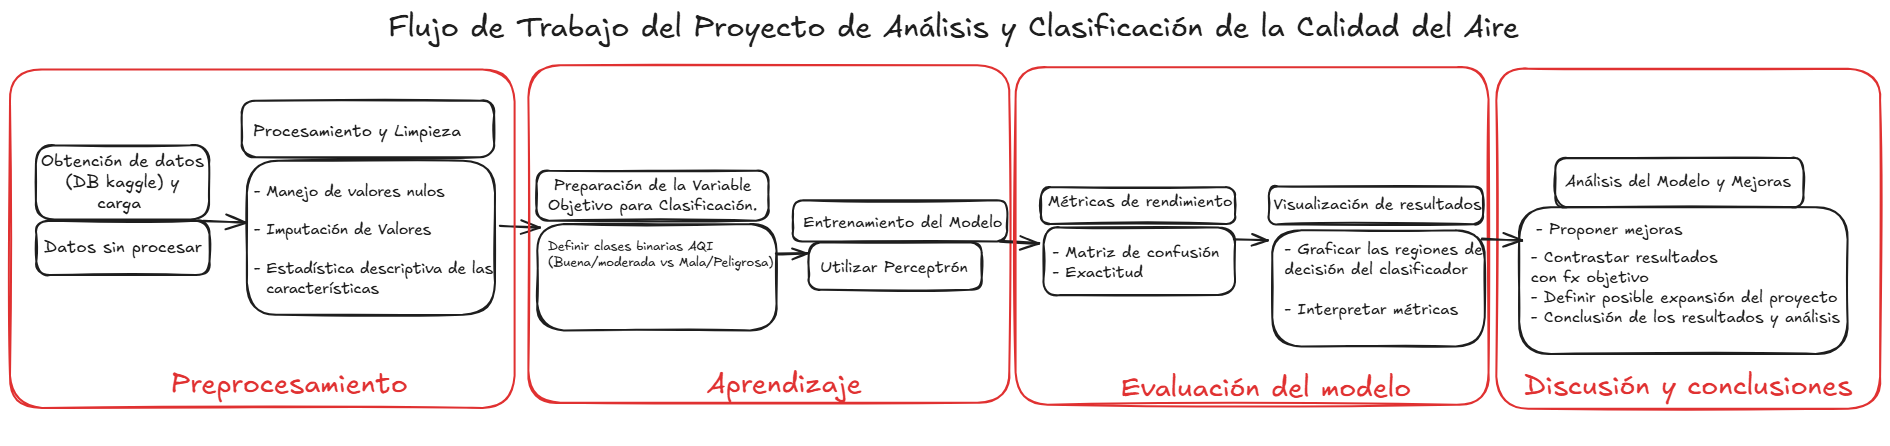

In [100]:
from IPython.display import Image
Image(filename='../Data/FTrabajo.png', width=2000)

### <a id="1-2"></a>1.2. Carga de Datos desde URL


Se procederá a cargar el conjunto de datos en un DataFrame de `pandas`. La carga se realizará directamente desde la URL pública donde se encuentra alojado el archivo CSV para asegurar la reproducibilidad del proyecto.

### Carga de Datos

In [101]:
import pandas as pd 

rutaDatos = '../Data/Air_Quality.csv'
dataFrame = pd.read_csv(rutaDatos)

#Info bascia para observar el paronama de los datos
print (dataFrame.head())


                        Date      City     CO  CO2   NO2  SO2    O3  PM2.5  \
0  2024-01-01 00:00:00+00:00  Brasilia  323.0  NaN  23.8  2.8  42.0   12.0   
1  2024-01-01 01:00:00+00:00  Brasilia  318.0  NaN  21.9  2.7  40.0   12.5   
2  2024-01-01 02:00:00+00:00  Brasilia  309.0  NaN  19.2  2.6  39.0   12.1   
3  2024-01-01 03:00:00+00:00  Brasilia  295.0  NaN  16.3  2.4  38.0   11.4   
4  2024-01-01 04:00:00+00:00  Brasilia  270.0  NaN  13.0  2.1  40.0   10.2   

   PM10        AQI  
0  17.1  16.800000  
1  17.9  16.000000  
2  17.3  15.599999  
3  16.2  15.200000  
4  14.6  16.000000  


### Inspeccion inicial del Data Frame 
Vision general de los datos

In [102]:
print (dataFrame.info())
print (dataFrame.describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   CO2     9648 non-null   float64
 4   NO2     52704 non-null  float64
 5   SO2     52704 non-null  float64
 6   O3      52704 non-null  float64
 7   PM2.5   52704 non-null  float64
 8   PM10    52704 non-null  float64
 9   AQI     52704 non-null  float64
dtypes: float64(8), object(2)
memory usage: 4.0+ MB
None
<bound method NDFrame.describe of                             Date      City     CO    CO2   NO2   SO2    O3  \
0      2024-01-01 00:00:00+00:00  Brasilia  323.0    NaN  23.8   2.8  42.0   
1      2024-01-01 01:00:00+00:00  Brasilia  318.0    NaN  21.9   2.7  40.0   
2      2024-01-01 02:00:00+00:00  Brasilia  309.0    NaN  19.2   2.6  39.0   
3      2024-01-01 03:00:00+00:00  Brasilia  

### Corregir el formato de la columna de fecha 
Convertiremos la columna de fecha al tipo `datetime`, despues se convertira en el index del Data Frame 

In [103]:
# Columna de texto a un objeto de fecha y hora (datetime)
dataFrame['Date'] = pd.to_datetime(dataFrame['Date'])

# Establece la columna 'Date' como el nuevo índice del DataFrame
dataFrame.set_index('Date', inplace=True)

# Verificamos que el cambio se haya realizado correctamente
print("--- Info después de procesar la fecha ---")
dataFrame.info()

print("\n--- DataFrame con índice de fecha ---")
display(dataFrame.head())

--- Info después de procesar la fecha ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52704 entries, 2024-01-01 00:00:00+00:00 to 2024-12-31 23:00:00+00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    52704 non-null  object 
 1   CO      52704 non-null  float64
 2   CO2     9648 non-null   float64
 3   NO2     52704 non-null  float64
 4   SO2     52704 non-null  float64
 5   O3      52704 non-null  float64
 6   PM2.5   52704 non-null  float64
 7   PM10    52704 non-null  float64
 8   AQI     52704 non-null  float64
dtypes: float64(8), object(1)
memory usage: 4.0+ MB

--- DataFrame con índice de fecha ---


,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
Date,,,,,,,,,
2024-01-01 00:00:00+00:00,Brasilia,323.0,NaN,23.8,2.8,42.0,12.0,17.1,16.800000
2024-01-01 01:00:00+00:00,Brasilia,318.0,NaN,21.9,2.7,40.0,12.5,17.9,16.000000
2024-01-01 02:00:00+00:00,Brasilia,309.0,NaN,19.2,2.6,39.0,12.1,17.3,15.599999
2024-01-01 03:00:00+00:00,Brasilia,295.0,NaN,16.3,2.4,38.0,11.4,16.2,15.200000
2024-01-01 04:00:00+00:00,Brasilia,270.0,NaN,13.0,2.1,40.0,10.2,14.6,16.000000


### Manejo de valores nulos 
Identificaremos y rellenaremos cualquier dato faltante en los datos usando el método  de interpolación

In [104]:
# Contamos cuántos valores nulos por columna
print("--- Conteo de valores nulos ANTES del tratamiento ---")
print(dataFrame.isnull().sum())

# Interpolar los valores nulos
dataFrame.interpolate(method='linear', inplace=True)

# Volver a contar para la comprobacion
print("\n--- Conteo de valores nulos DESPUÉS del tratamiento ---")
print(dataFrame.isnull().sum())

--- Conteo de valores nulos ANTES del tratamiento ---
City         0
CO           0
CO2      43056
NO2          0
SO2          0
O3           0
PM2.5        0
PM10         0
AQI          0
dtype: int64

--- Conteo de valores nulos DESPUÉS del tratamiento ---
City        0
CO          0
CO2      7176
NO2         0
SO2         0
O3          0
PM2.5       0
PM10        0
AQI         0
dtype: int64


C:\Users\evrdz\AppData\Local\Temp\ipykernel_10524\3119580352.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dataFrame.interpolate(method='linear', inplace=True)


### Guardamos el Data Frame ya procesado

In [105]:
# Define la ruta para el nuevo archivo CSV limpio (variable en camelCase, nombre de archivo en PascalCase)
rutaArchivoLimpio = '../Data/AirQualityCleaned.csv'

# Guarda el Data Frame actual (limpio y procesado) 
# index=True asegura que la columna de fecha se guarde en el archivo
dataFrame.to_csv(rutaArchivoLimpio, index=True)

print(f"\n¡Proceso de limpieza completado!")
print(f"Los datos limpios se han guardado en: '{rutaArchivoLimpio}'")


¡Proceso de limpieza completado!
Los datos limpios se han guardado en: '../Data/AirQualityCleaned.csv'
